In [1]:
import numpy as np
import pandas as pd
import os
import random

In [2]:
DATA_IN_PATH = './quora/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
print(train_data.head(2))
train_data.info()
print("파일 크기:")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file)/1000000, 2)) + 'MB')

print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
파일 크기:
sample_submission.csv         22.35MB
test.csv                  

In [3]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()
print(train_set.head())
print('train data의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문 수: {}'.format(np.sum(train_set.value_counts() > 1)))
print(train_set.sample(10, random_state =42))

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object
train data의 총 질문 수: 537361
반복해서 나타나는 질문 수: 111873
47617     What is truly the minimum for a minimum viable...
180001                       What are the Best B2B website?
286004    Would there be a World War 3, if South China S...
495904            Will WBJEE be cancelled due to NEET 2016?
647885                Why can't I stop crying when I'm mad?
584969         Which is the best laptop under 60k in india?
337773               What would your superpower be and why?
713627               How can I stop the urge to masturbate?
153750           Which is the best place to visit in India?
757778    Why is valet called valet? How did valet origi...
dtype: object


In [4]:
data = pd.read_csv('./quora/train.csv',index_col='id')
data.shape

(404290, 5)

In [5]:
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer 
from nltk.tokenize.casual import casual_tokenize

In [6]:
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens
def preprocess2(text):
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens
def preprocess3(text):
    tokens = casual_tokenize(text)
    return tokens

In [7]:
def preprocess4(text):
    ''' text를 list로 전처리하는 과정 '''
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.lower()
    text = text.split()

    return text

In [8]:
is_duplicate_pairs = train_data['is_duplicate']== 1
new_train_data01 = train_data[is_duplicate_pairs]
new_train_data01.head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [9]:
new_train_data01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149263 entries, 5 to 404286
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            149263 non-null  int64 
 1   qid1          149263 non-null  int64 
 2   qid2          149263 non-null  int64 
 3   question1     149263 non-null  object
 4   question2     149263 non-null  object
 5   is_duplicate  149263 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.0+ MB


In [10]:
x1 = new_train_data01['question1'].tolist()
x2 = new_train_data01['question2'].tolist()

In [11]:
new_duplicate_pairs = new_train_data01.sample(n=10)
new_duplicate_pairs.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
395741,395741,324729,76404,What should I do in free time?,What do you do with your free time?,1
110032,110032,23108,87157,Why is salt water taffy candy imported in France?,Why is Saltwater Taffy candy imported in Jamaica?,1
21275,21275,14926,14695,What is the best way to lose weight and not ga...,How can I lose weight effectively?,1
292728,292728,26518,39443,What are the dumbest questions ever asked on Q...,What is the most stupid question asked on Quora?,1
357950,357950,487368,487369,Is masturbating a sin according to Christian?,Is masturbation is a sin according to Christia...,1
173656,173656,267834,267835,How long does it usually take to learn Hadoop?,How long does it take to learn Hadoop?,1
22957,22957,43046,43047,Should fine art and crafts be separated?,"Should crafts be considered a fine art, or in ...",1
234564,234564,252890,299076,What country would you never return to?,Which country should I not visit?,1
15916,15916,12304,9662,What are some of your New Year's resolutions f...,What Is your New year resolutions in 2017?,1
297451,297451,75014,2921,"How would abolishing Rs. 500,1000 notes help i...",Would demonetization of 500 and 1000 rupee not...,1


In [12]:
x1 = new_duplicate_pairs['question1'].tolist()
x2 = new_duplicate_pairs['question2'].tolist()
print(x1, x2)

['What should I do in free time?', 'Why is salt water taffy candy imported in France?', 'What is the best way to lose weight and not gain it back?', 'What are the dumbest questions ever asked on Quora?', 'Is masturbating a sin according to Christian?', 'How long does it usually take to learn Hadoop?', 'Should fine art and crafts be separated?', 'What country would you never return to?', "What are some of your New Year's resolutions for 2017?", 'How would abolishing Rs. 500,1000 notes help in stopping the production of black money and curb corruption?'] ['What do you do with your free time?', 'Why is Saltwater Taffy candy imported in Jamaica?', 'How can I lose weight effectively?', 'What is the most stupid question asked on Quora?', 'Is masturbation is a sin according to Christianity?', 'How long does it take to learn Hadoop?', 'Should crafts be considered a fine art, or in a category of its own?', 'Which country should I not visit?', 'What Is your New year resolutions in 2017?', 'Would

In [13]:
l1 = []
for i in x1:
    x11 = preprocess4(i)
    l1.append(x11)
l2 = []
for i in x2:
    x22 = preprocess4(i)
    l2.append(x22)
print(l1)
print('################1-shingles, one-gram으로 추출했을 경우########################')
print(l2)

[['what', 'should', 'i', 'do', 'in', 'free', 'time'], ['why', 'is', 'salt', 'water', 'taffy', 'candy', 'imported', 'in', 'france'], ['what', 'is', 'the', 'best', 'way', 'to', 'lose', 'weight', 'and', 'not', 'gain', 'it', 'back'], ['what', 'are', 'the', 'dumbest', 'questions', 'ever', 'asked', 'on', 'quora'], ['is', 'masturbating', 'a', 'sin', 'according', 'to', 'christian'], ['how', 'long', 'does', 'it', 'usually', 'take', 'to', 'learn', 'hadoop'], ['should', 'fine', 'art', 'and', 'crafts', 'be', 'separated'], ['what', 'country', 'would', 'you', 'never', 'return', 'to'], ['what', 'are', 'some', 'of', 'your', 'new', 'year', 'resolutions', 'for', '2017'], ['how', 'would', 'abolishing', 'rs', '500', '1000', 'notes', 'help', 'in', 'stopping', 'the', 'production', 'of', 'black', 'money', 'and', 'curb', 'corruption']]
################1-shingles, one-gram으로 추출했을 경우########################
[['what', 'do', 'you', 'do', 'with', 'your', 'free', 'time'], ['why', 'is', 'saltwater', 'taffy', 'candy'

In [14]:
#shingle을 한 문장으로 추출 후 다시 vector로 표현
def shingles_to_one_list(long):
    short = ''
    for k in long:
        if long.index(k) == len(long) - 1:
            short = short + k
        else:
            short = short + k + ' '
    return short

In [15]:
corpus_l1 = []
corpus_l2 = []
for i in range(10):
    aa = shingles_to_one_list(l1[i])
    bb = shingles_to_one_list(l2[i])
    corpus_l1.append(str(aa))
    corpus_l2.append(str(bb))
print(corpus_l1)
print(corpus_l2)


['what should i do in free time', 'why is salt water taffy candy imported in france', 'what is the best way to lose weight and not gain it back', 'what are the dumbest questions ever asked on quora', 'is masturbating a sin according to christian', 'how long does it usually take to learn hadoop', 'should fine art and crafts be separated', 'what country would you never return to', 'what are some of your new year resolutions for 2017', 'how would abolishing rs 500 1000 notes help in stopping the production of black money and curb corruption']
['what do you do with your free time', 'why is saltwater taffy candy imported in jamaica', 'how can i lose weight effectively', 'what is the most stupid question asked on quora', 'is masturbation is a sin according to christianity', 'how long does it take to learn hadoop', 'should crafts be considered a fine art or in a category of its own', 'which country should i not visit', 'what is your new year resolutions in 2017', 'would demonetization of 500 

In [16]:
def get_document_vector(d1, d2):
    """
    z = set()
    for i in d1:
        z.add(i)
    for j in d2:
        z.add(i)
    """
    corpus = {}
    sentences = d1 + '\n'
    sentences += d2
    for i, document in enumerate(sentences.split('\n')):
        corpus['document{}'.format(i)] = dict((tok, 1) for tok in document.split(' '))
    df = pd.DataFrame.from_records(corpus).fillna(0).astype(int)
    return df

In [17]:
for i in range(10):
    document_vector = get_document_vector(corpus_l1[i], corpus_l2[i])
    print(document_vector)

        document0  document1
what            1          1
should          1          0
i               1          0
do              1          1
in              1          0
free            1          1
time            1          1
you             0          1
with            0          1
your            0          1
           document0  document1
why                1          1
is                 1          1
salt               1          0
water              1          0
taffy              1          1
candy              1          1
imported           1          1
in                 1          1
france             1          0
saltwater          0          1
jamaica            0          1
             document0  document1
what                 1          0
is                   1          0
the                  1          0
best                 1          0
way                  1          0
to                   1          0
lose                 1          1
weight               1   

In [18]:
# k = 5로 잡았을 때
def get_shingles(size, f):
    for i in range(0, len(f)-5+1):
        yield tuple(f[i:i+5])
shingles01 = { i for i in get_shingles(5, l1[0])}
print(shingles01)

{('i', 'do', 'in', 'free', 'time'), ('should', 'i', 'do', 'in', 'free'), ('what', 'should', 'i', 'do', 'in')}


In [19]:
shingles02 = { i for i in get_shingles(5, l2[0])}
print(shingles02)
    

{('do', 'with', 'your', 'free', 'time'), ('what', 'do', 'you', 'do', 'with'), ('you', 'do', 'with', 'your', 'free'), ('do', 'you', 'do', 'with', 'your')}


In [20]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    d = float((len(a) + len(b))) - len(c)
    return float(len(c)) / d

In [21]:
jaccard_similarity(shingles01, shingles02)

0.0

In [22]:
print(len(l1), len(l2))

10 10


In [23]:
def set_to_list(xx):
    l = list(xx)
    return l     

In [24]:
x234 = []
for i in l1:
    shingles = { i for i in get_shingles(5, i)}
    set_to_list(shingles)
    x234.append(list(shingles))
print(x234)

[[('i', 'do', 'in', 'free', 'time'), ('should', 'i', 'do', 'in', 'free'), ('what', 'should', 'i', 'do', 'in')], [('why', 'is', 'salt', 'water', 'taffy'), ('water', 'taffy', 'candy', 'imported', 'in'), ('salt', 'water', 'taffy', 'candy', 'imported'), ('is', 'salt', 'water', 'taffy', 'candy'), ('taffy', 'candy', 'imported', 'in', 'france')], [('and', 'not', 'gain', 'it', 'back'), ('the', 'best', 'way', 'to', 'lose'), ('weight', 'and', 'not', 'gain', 'it'), ('is', 'the', 'best', 'way', 'to'), ('way', 'to', 'lose', 'weight', 'and'), ('lose', 'weight', 'and', 'not', 'gain'), ('to', 'lose', 'weight', 'and', 'not'), ('what', 'is', 'the', 'best', 'way'), ('best', 'way', 'to', 'lose', 'weight')], [('dumbest', 'questions', 'ever', 'asked', 'on'), ('are', 'the', 'dumbest', 'questions', 'ever'), ('what', 'are', 'the', 'dumbest', 'questions'), ('questions', 'ever', 'asked', 'on', 'quora'), ('the', 'dumbest', 'questions', 'ever', 'asked')], [('is', 'masturbating', 'a', 'sin', 'according'), ('masturb

In [25]:
x235 = []
for i in l2:
    shingles = { i for i in get_shingles(5, i)}
    set_to_list(shingles)
    x235.append(list(shingles))
print(x235)

[[('do', 'with', 'your', 'free', 'time'), ('what', 'do', 'you', 'do', 'with'), ('you', 'do', 'with', 'your', 'free'), ('do', 'you', 'do', 'with', 'your')], [('why', 'is', 'saltwater', 'taffy', 'candy'), ('taffy', 'candy', 'imported', 'in', 'jamaica'), ('is', 'saltwater', 'taffy', 'candy', 'imported'), ('saltwater', 'taffy', 'candy', 'imported', 'in')], [('can', 'i', 'lose', 'weight', 'effectively'), ('how', 'can', 'i', 'lose', 'weight')], [('stupid', 'question', 'asked', 'on', 'quora'), ('what', 'is', 'the', 'most', 'stupid'), ('is', 'the', 'most', 'stupid', 'question'), ('the', 'most', 'stupid', 'question', 'asked'), ('most', 'stupid', 'question', 'asked', 'on')], [('is', 'a', 'sin', 'according', 'to'), ('masturbation', 'is', 'a', 'sin', 'according'), ('is', 'masturbation', 'is', 'a', 'sin'), ('a', 'sin', 'according', 'to', 'christianity')], [('does', 'it', 'take', 'to', 'learn'), ('long', 'does', 'it', 'take', 'to'), ('it', 'take', 'to', 'learn', 'hadoop'), ('how', 'long', 'does', 'i

In [26]:
i = 0
d = {}
for value in x1:
    d[i] = value
    d[i] = re.sub("[^\w]", " ", d[i]).split()
    if d[i]:
        i = i + 1
    else:
        del d[i]
print(d)

{0: ['What', 'should', 'I', 'do', 'in', 'free', 'time'], 1: ['Why', 'is', 'salt', 'water', 'taffy', 'candy', 'imported', 'in', 'France'], 2: ['What', 'is', 'the', 'best', 'way', 'to', 'lose', 'weight', 'and', 'not', 'gain', 'it', 'back'], 3: ['What', 'are', 'the', 'dumbest', 'questions', 'ever', 'asked', 'on', 'Quora'], 4: ['Is', 'masturbating', 'a', 'sin', 'according', 'to', 'Christian'], 5: ['How', 'long', 'does', 'it', 'usually', 'take', 'to', 'learn', 'Hadoop'], 6: ['Should', 'fine', 'art', 'and', 'crafts', 'be', 'separated'], 7: ['What', 'country', 'would', 'you', 'never', 'return', 'to'], 8: ['What', 'are', 'some', 'of', 'your', 'New', 'Year', 's', 'resolutions', 'for', '2017'], 9: ['How', 'would', 'abolishing', 'Rs', '500', '1000', 'notes', 'help', 'in', 'stopping', 'the', 'production', 'of', 'black', 'money', 'and', 'curb', 'corruption']}


In [27]:
from datasketch import MinHash

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

0 0 1.0
1 1 0.0
2 2 0.0
3 3 1.0
4 4 1.0
5 5 1.0
6 6 0.0
7 7 0.0
8 8 1.0
9 9 1.0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
0 0 0.0
1 1 0.0
2 2 0.0
3 3 0.0
4 4 0.0
5 5 0.0
6 6 0.0
7 7 0.0
8 8 0.0
9 9 0.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0 0 0.5
1 1 0.0
2 2 0.0
3 3 0.5
4 4 1.0
5 5 1.0
6 6 0.0
7 7 0.0
8 8 0.5
9 9 0.5
[[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.

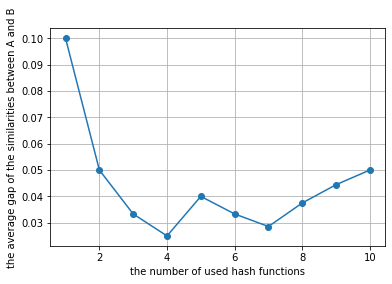

In [33]:
xxx = [w for w in range(1, 11)]
yyy = []
for s in range(1, 11):
    matrix_estimated_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                if i == j:     
                    m1, m2 = MinHash(num_perm = s), MinHash(num_perm = s)
                    for k in x234[i]:
                        for d in k:
                            m1.update(d.encode('utf8'))
                    for k in x235[j]:
                        for d in k:
                            m2.update(d.encode('utf8'))
                    matrix_estimated_jaccard[i, j] = m1.jaccard(m2)
                    print(i, j, m1.jaccard(m2))
                else: 
                    pass
    print(matrix_estimated_jaccard)
    matrix_true_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
            if i == j:
                s1 = set()
                s2 = set()
                for k in x234[i]:
                    s1.add(k)
                for m in x235[j]:
                    s2.add(m)    
                if float(len(s1.union(s2))) == 0:
                    matrix_true_jaccard[i, j] = 0
                    actual_jaccard = 0
                else:
                    actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
                    matrix_true_jaccard[i, j] = actual_jaccard
                print(i, j, actual_jaccard)
            else: 
                pass
    print(matrix_true_jaccard)
    for i in range(len(l1)):
        for j in range(len(l2)):
            total_p = 0
            if i == j:
                total_p += abs(matrix_estimated_jaccard[i, j] - matrix_true_jaccard[i, j])
            else:
                pass
    average_gap_k_5 = total_p/len(l1)
    yyy.append(average_gap_k_5)
plt.figure()
plt.xlabel('')
plt.plot(xxx, yyy, marker = 'o')
plt.grid(True)
plt.xlabel('the number of used hash functions')
plt.ylabel('the average gap of the similarities between A and B')
plt.show()

0 0 1.0
1 1 0.0
2 2 0.0
3 3 1.0
4 4 1.0
5 5 1.0
6 6 0.0
7 7 0.0
8 8 1.0
9 9 1.0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
0 0 0.4
1 1 0.5454545454545454
2 2 0.11764705882352941
3 3 0.38461538461538464
4 4 0.5555555555555556
5 5 0.8888888888888888
6 6 0.3333333333333333
7 7 0.08333333333333333
8 8 0.5
9 9 0.43478260869565216
[[0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.54545455 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.11764706 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.38461538 0.         0.
  0.

3 3 0.3684210526315789
4 4 0.631578947368421
5 5 0.8947368421052632
6 6 0.21052631578947367
7 7 0.15789473684210525
8 8 0.42105263157894735
9 9 0.47368421052631576
[[0.31578947 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.63157895 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.10526316 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.36842105 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.63157895 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.89473684
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.21052632 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.1578

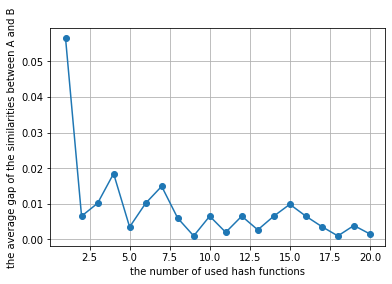

In [34]:
x_axis = [w for w in range(1, 21)]
y_axis = []
for s in range(1, 21):
    matrix_estimated_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                if i == j:     
                    m1, m2 = MinHash(num_perm = s), MinHash(num_perm = s)
                    for d in l1[i]:
                        m1.update(d.encode('utf8'))
                    for d in l2[j]:
                        m2.update(d.encode('utf8'))
                    matrix_estimated_jaccard[i, j] = m1.jaccard(m2)
                    print(i, j, m1.jaccard(m2))
                else: 
                    pass
    print(matrix_estimated_jaccard)
    matrix_true_jaccard = np.zeros((len(l1), len(l2)))
    for i in range(len(l1)):
        for j in range(len(l2)):
                s1 = set(l1[i])
                s2 = set(l2[j])
                if i == j:
                    actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
                    matrix_true_jaccard[i, j] = actual_jaccard
                    print(i, j, actual_jaccard)
                else: 
                    pass
    print(matrix_true_jaccard)
    for i in range(len(l1)):
        for j in range(len(l2)):
            total_p = 0
            if i == j:
                total_p += abs(matrix_estimated_jaccard[i, j] - matrix_true_jaccard[i, j])
            else:
                pass
    average_gap = total_p/len(l1)
    y_axis.append(average_gap)
plt.figure()
plt.xlabel('')
plt.plot(x_axis, y_axis, marker = 'o')
plt.grid(True)
plt.xlabel('the number of used hash functions')
plt.ylabel('the average gap of the similarities between A and B')
plt.show()